Goal

Given the information like mortgage details, borrowers related details and payment details. Our objective is to predict if the loan will be paid on the 13th month or not here 1=not paid,0=paid  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv(r'E:\DS FILES\loan_dataset.csv')
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [10]:
data1.shape

(116058, 49)

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116058 non-null  int64  
 1   source                    116058 non-null  object 
 2   financial_institution     116058 non-null  object 
 3   interest_rate             116058 non-null  float64
 4   unpaid_principal_bal      116058 non-null  int64  
 5   loan_term                 116058 non-null  int64  
 6   origination_date          116058 non-null  object 
 7   first_payment_date        116058 non-null  object 
 8   loan_to_value             116058 non-null  int64  
 9   number_of_borrowers       116058 non-null  float64
 10  debt_to_income_ratio      116058 non-null  float64
 11  borrower_credit_score     116058 non-null  float64
 12  loan_purpose              116058 non-null  object 
 13  insurance_percent         116058 non-null  f

In [11]:
data1.isnull().sum() 

interest_rate                                        0
unpaid_principal_bal                                 0
loan_term                                            0
loan_to_value                                        0
number_of_borrowers                                  0
debt_to_income_ratio                                 0
borrower_credit_score                                0
insurance_percent                                    0
co-borrower_credit_score                             0
insurance_type                                       0
m1                                                   0
m2                                                   0
m3                                                   0
m4                                                   0
m5                                                   0
m6                                                   0
m7                                                   0
m8                                                   0
m9        

In [4]:
#Convering Object to date datatype
data[["origination_date"]] = data[["origination_date"]].apply(pd.to_datetime)
data[["first_payment_date"]] = data[["first_payment_date"]].apply(pd.to_datetime)

In [5]:
import datetime
data["days_taken_for_1st_payment"] = (data.first_payment_date - data.origination_date).astype('timedelta64[D]')
data["days_taken_for_1st_payment"]

0         61.0
1         60.0
2         60.0
3         60.0
4         60.0
          ... 
116053    60.0
116054    60.0
116055    60.0
116056    60.0
116057    60.0
Name: days_taken_for_1st_payment, Length: 116058, dtype: float64

In [6]:
#Checking values of categorical attributes
cat_val = ["source", "financial_institution", "loan_purpose"]
for col in cat_val:
    print ([col]," : ",data[col].unique())

['source']  :  ['Z' 'Y' 'X']
['financial_institution']  :  ['Turner, Baldwin and Rhodes' 'Swanson, Newton and Miller'
 'Thornton-Davis' 'OTHER' 'Browning-Hart' 'Richardson Ltd'
 'Edwards-Hoffman' 'Richards-Walters' 'Martinez, Duffy and Bird'
 'Miller, Mcclure and Allen' 'Anderson-Taylor'
 'Taylor, Hunt and Rodriguez' 'Nicholson Group' 'Cole, Brooks and Vincent'
 'Sanchez, Hays and Wilkerson' 'Sanchez-Robinson' 'Suarez Inc'
 'Romero, Woods and Johnson' 'Chapman-Mcmahon']
['loan_purpose']  :  ['C86' 'B12' 'A23']


In [7]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(data[["source", "financial_institution", "loan_purpose"]])
dummy

,source_X,source_Y,source_Z,financial_institution_Anderson-Taylor,financial_institution_Browning-Hart,financial_institution_Chapman-Mcmahon,"financial_institution_Cole, Brooks and Vincent",financial_institution_Edwards-Hoffman,"financial_institution_Martinez, Duffy and Bird","financial_institution_Miller, Mcclure and Allen",...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
116054,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
116055,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
116056,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
new_data = pd.concat([data, dummy], axis=1)
new_data

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,2012-05-01,95,1.0,...,0,0,0,0,0,0,1,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,2012-03-01,72,1.0,...,0,0,0,1,0,0,0,0,1,0
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,2012-03-01,49,1.0,...,0,0,0,0,0,1,0,0,1,0
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,2012-04-01,46,2.0,...,0,0,0,0,0,0,0,0,1,0
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,2012-04-01,80,1.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,382119962287,Y,Browning-Hart,4.125,153000,360,2012-02-01,2012-04-01,88,2.0,...,0,0,0,0,0,0,0,1,0,0
116054,582803915466,Z,OTHER,3.000,150000,120,2012-01-01,2012-03-01,35,1.0,...,0,0,0,0,0,0,0,0,1,0
116055,837922316947,X,OTHER,3.875,166000,360,2012-02-01,2012-04-01,58,2.0,...,0,0,0,0,0,0,0,0,1,0
116056,477343182138,X,OTHER,4.250,169000,360,2012-02-01,2012-04-01,74,2.0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
#Drop the unneccsary columns
data1 = new_data.drop(["loan_id","source", "financial_institution", "loan_purpose","origination_date","first_payment_date"],axis =1)
data1

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,4.125,153000,360,88,2.0,22.0,801.0,25.0,802.0,0.0,...,0,0,0,0,0,0,0,1,0,0
116054,3.000,150000,120,35,1.0,37.0,796.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
116055,3.875,166000,360,58,2.0,49.0,724.0,0.0,723.0,0.0,...,0,0,0,0,0,0,0,0,1,0
116056,4.250,169000,360,74,2.0,13.0,755.0,0.0,746.0,0.0,...,0,0,0,0,0,0,0,1,0,0


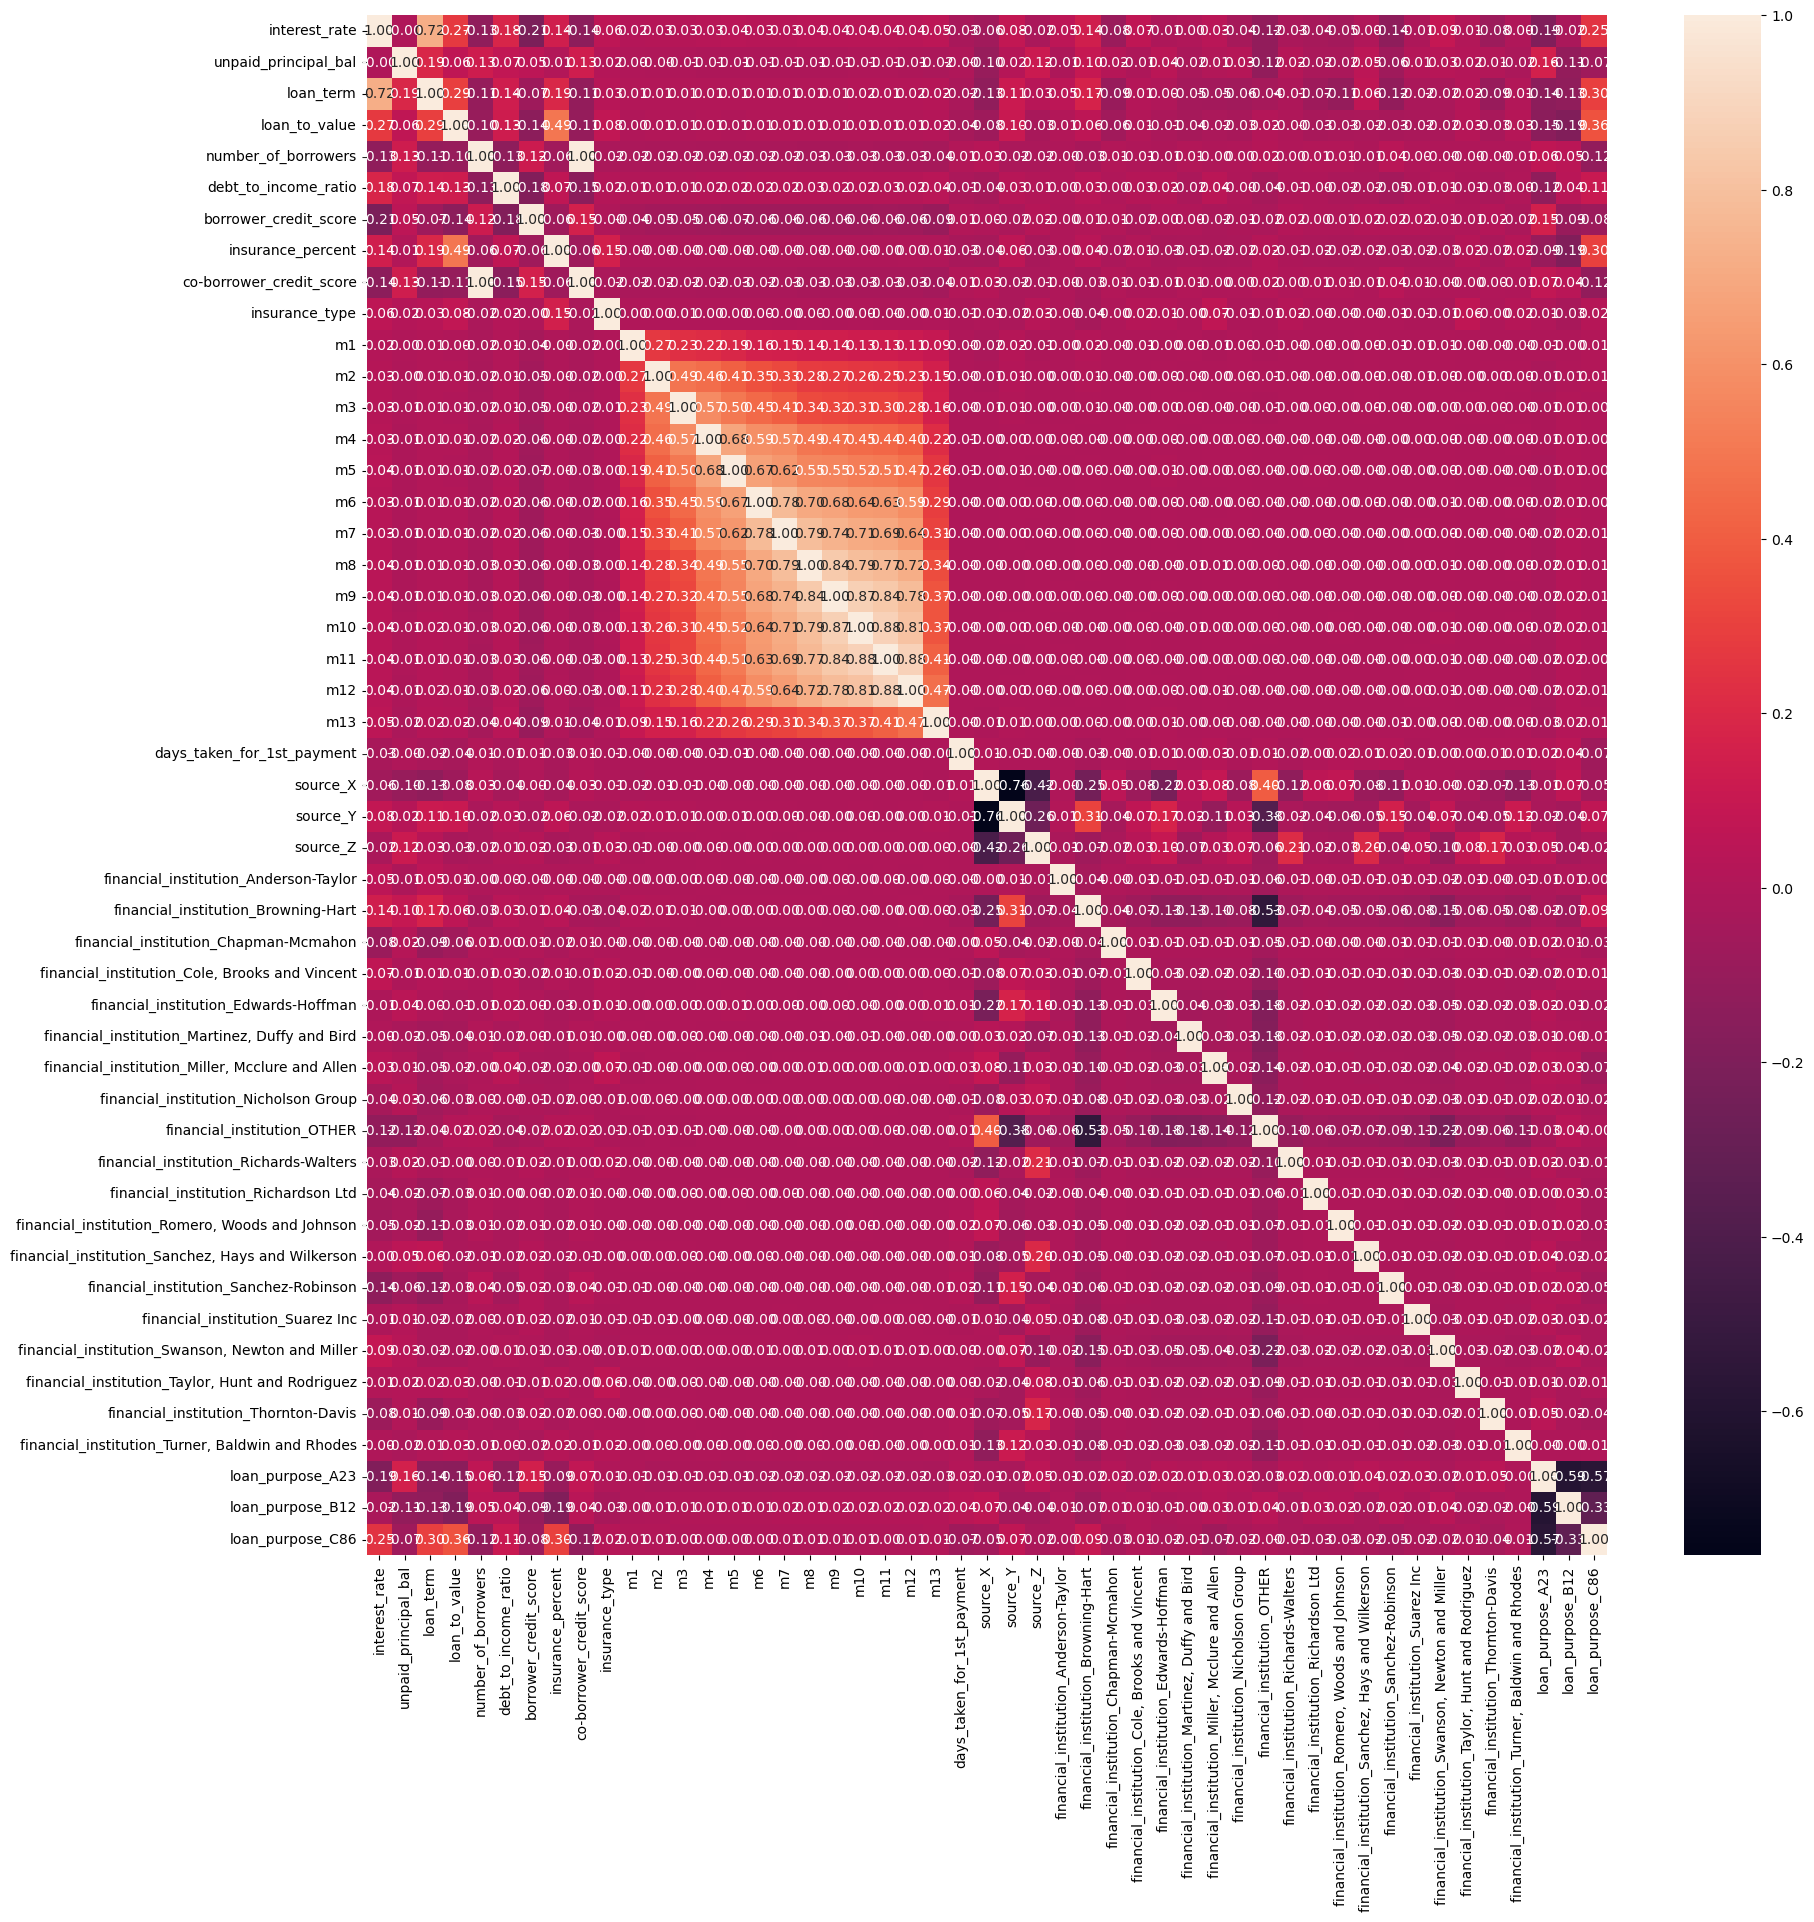

In [12]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data1.corr(), annot = True, fmt= '.2f')
plt.show()

In [13]:
data1.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13', 'days_taken_for_1st_payment', 'source_X', 'source_Y', 'source_Z',
       'financial_institution_Anderson-Taylor',
       'financial_institution_Browning-Hart',
       'financial_institution_Chapman-Mcmahon',
       'financial_institution_Cole, Brooks and Vincent',
       'financial_institution_Edwards-Hoffman',
       'financial_institution_Martinez, Duffy and Bird',
       'financial_institution_Miller, Mcclure and Allen',
       'financial_institution_Nicholson Group', 'financial_institution_OTHER',
       'financial_institution_Richards-Walters',
       'financial_institution_Richardson Ltd',
       'financial_institution_Romero, Woods and Johnson',
       'fina

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 49 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   interest_rate                                      116058 non-null  float64
 1   unpaid_principal_bal                               116058 non-null  int64  
 2   loan_term                                          116058 non-null  int64  
 3   loan_to_value                                      116058 non-null  int64  
 4   number_of_borrowers                                116058 non-null  float64
 5   debt_to_income_ratio                               116058 non-null  float64
 6   borrower_credit_score                              116058 non-null  float64
 7   insurance_percent                                  116058 non-null  float64
 8   co-borrower_credit_score                           116058 non-null  float6

In [15]:
data1.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
X = data1.drop(["m13"], axis=1)
y = data1['m13']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
ac_list = []
model_names = []

# StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs', random_state=42,max_iter=1000) # create an instance 
model=lr.fit(X_train,y_train)# create the model
y_pred=model.predict(X_test)  # preditction

In [21]:
confusion_matrix(y_test,y_pred)


array([[28849,     3],
       [  120,    43]], dtype=int64)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28852
           1       0.93      0.26      0.41       163

    accuracy                           1.00     29015
   macro avg       0.97      0.63      0.70     29015
weighted avg       1.00      1.00      0.99     29015



In [23]:
MR_ac=accuracy_score(y_test,y_pred)
ac_list.append(MR_ac)
model_names.append('LR')

In [52]:
MR_pred_df = pd.DataFrame(pd.Series(y_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), MR_pred_df], axis=1)

,m13,Test Outcome
0,28852,28969
1,163,46


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]    #empty list
neighbors=np.arange(3,15)# taking valuse for 3 to 14 to the variable 

for k in neighbors:   # creating  a loop k (3 to 14)
    # create knn model  where k is 3 first till it is 14 
    knn=KNeighborsClassifier(n_neighbors=k)    # create an instance 
    model1=knn.fit(X_train,y_train)    # create the model
    y_pred_knn=model1.predict(X_test)   # preditction
    acc=accuracy_score(y_test,y_pred_knn)  # accurary
    metric_k.append(acc)   # append accuray to list 
 # check which valuse of k will give highest accuarcy

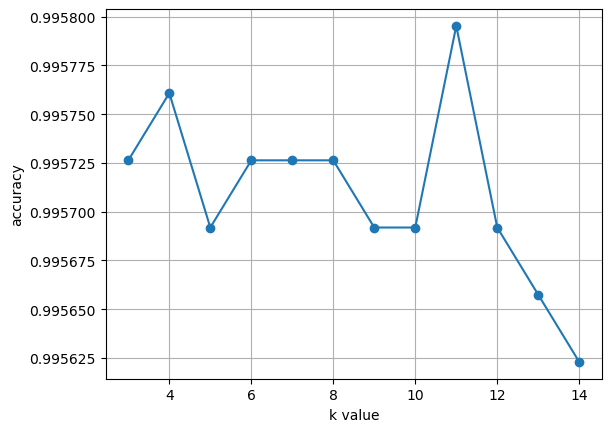

In [25]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()# k value is more for 8 so

In [26]:
knn=KNeighborsClassifier(n_neighbors=9)
model1=knn.fit(X_train,y_train)
y_pred_knn=model1.predict(X_test)

In [27]:
confusion_matrix(y_test,y_pred_knn)

array([[28846,     6],
       [  119,    44]], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28852
           1       0.88      0.27      0.41       163

    accuracy                           1.00     29015
   macro avg       0.94      0.63      0.71     29015
weighted avg       1.00      1.00      0.99     29015



In [29]:
KNN_ac = accuracy_score(y_test, y_pred_knn)
ac_list.append(KNN_ac)
model_names.append('KNN')

In [53]:
KNN_pred_df = pd.DataFrame(pd.Series(y_pred_knn).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), KNN_pred_df], axis=1)

,m13,Test Outcome
0,28852,28965
1,163,50


# SVC 

In [30]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='rbf')
svm_model=svm_clf.fit(X_train,y_train)
y_pred1=svm_clf.predict(X_test)

In [31]:
confusion_matrix(y_test,y_pred1)

array([[28852,     0],
       [  153,    10]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     28852
           1       1.00      0.06      0.12       163

    accuracy                           0.99     29015
   macro avg       1.00      0.53      0.56     29015
weighted avg       0.99      0.99      0.99     29015



In [33]:
SVC_rbf_ac = accuracy_score(y_test, y_pred1)
ac_list.append(SVC_rbf_ac)
model_names.append('SVC_rbf_ac')

In [54]:
SVC_pred_df = pd.DataFrame(pd.Series(y_pred1).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(),SVC_pred_df], axis=1)

,m13,Test Outcome
0,28852,29005
1,163,10


# SVC-Linear

In [34]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='linear')
svm_model=svm_clf.fit(X_train,y_train)
y_pred2=svm_clf.predict(X_test)

In [35]:
confusion_matrix(y_test,y_pred2)  

array([[28852,     0],
       [  132,    31]], dtype=int64)

In [36]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28852
           1       1.00      0.19      0.32       163

    accuracy                           1.00     29015
   macro avg       1.00      0.60      0.66     29015
weighted avg       1.00      1.00      0.99     29015



In [37]:
SVC_linear_ac = accuracy_score(y_test, y_pred2)
ac_list.append(SVC_linear_ac)
model_names.append('SVC_linear_ac')

In [55]:
svc_pred_df = pd.DataFrame(pd.Series(y_pred2).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(),svc_pred_df], axis=1)

,m13,Test Outcome
0,28852,28984
1,163,31


# SVC-Poly

In [38]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='poly', degree=8)
svm_model=svm_clf.fit(X_train,y_train)
y_pred3=svm_clf.predict(X_test)

In [39]:
confusion_matrix(y_test,y_pred3)  

array([[28829,    23],
       [  117,    46]], dtype=int64)

In [40]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28852
           1       0.67      0.28      0.40       163

    accuracy                           1.00     29015
   macro avg       0.83      0.64      0.70     29015
weighted avg       0.99      1.00      0.99     29015



In [41]:
SVC_poly_ac = accuracy_score(y_test, y_pred3)
ac_list.append(SVC_poly_ac)
model_names.append('SVC_poly_ac')

In [56]:
sv_pred_df = pd.DataFrame(pd.Series(y_pred3).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(),sv_pred_df], axis=1)

,m13,Test Outcome
0,28852,28946
1,163,69


# DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
DT_pred=dt_clf.predict(X_test)

In [43]:
confusion_matrix(y_test,DT_pred)

array([[28733,   119],
       [  104,    59]], dtype=int64)

In [44]:
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28852
           1       0.33      0.36      0.35       163

    accuracy                           0.99     29015
   macro avg       0.66      0.68      0.67     29015
weighted avg       0.99      0.99      0.99     29015



In [45]:
DT_ac = accuracy_score(y_test, DT_pred)
ac_list.append(DT_ac)
model_names.append('DT')

In [57]:
DT_pred_df = pd.DataFrame(pd.Series(DT_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(),DT_pred_df], axis=1)

,m13,Test Outcome
0,28852,28837
1,163,178


# RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
RFA_pred=rf_clf.predict(X_test)

In [47]:
confusion_matrix(y_test,RFA_pred) 

array([[28843,     9],
       [  113,    50]], dtype=int64)

In [48]:
print(classification_report(y_test, RFA_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28852
           1       0.85      0.31      0.45       163

    accuracy                           1.00     29015
   macro avg       0.92      0.65      0.72     29015
weighted avg       1.00      1.00      0.99     29015



In [49]:
RFA_ac = accuracy_score(y_test, RFA_pred)
ac_list.append(RFA_ac)
model_names.append('RFA')

In [58]:
RFA_pred_df = pd.DataFrame(pd.Series(RFA_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(),RFA_pred_df], axis=1)

,m13,Test Outcome
0,28852,28956
1,163,59


# Comparing Models

In [50]:
model_ac = pd.DataFrame(dict(zip(model_names, ac_list)), index=['model_names']).T
model_ac.rename(columns={'model_names': 'Accuracy'}, inplace=True)
round(model_ac*100, 3)

,Accuracy
LR,99.576
KNN,99.569
SVC_rbf_ac,99.473
SVC_linear_ac,99.545
SVC_poly_ac,99.517
DT,99.231
RFA,99.580


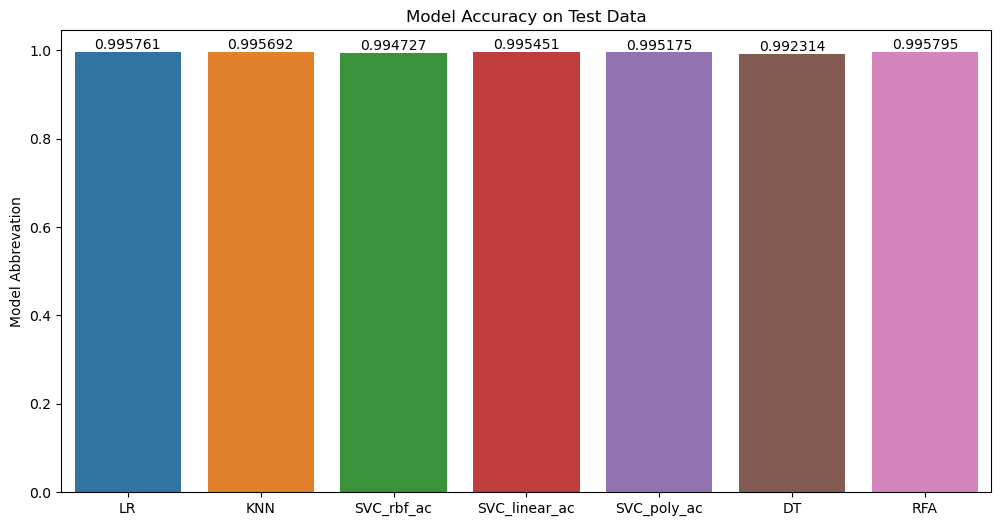

In [51]:
plt.figure(figsize=(12,6))
ax=sns.barplot(y='Accuracy', x=model_ac.index, data=model_ac)
ax.bar_label(ax.containers[0])
plt.title('Model Accuracy on Test Data')
plt.ylabel('Model Abbrevation')
plt.show()